In [10]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
!cp kaggle.json ~/.kaggle

In [0]:
!ls ~/.kaggle

In [0]:
!mkdir ./data

In [12]:
!kaggle competitions download -c expedia-personalized-sort -p {"./data"}

 99% 411M/414M [00:02<00:00, 201MB/s]
100% 414M/414M [00:02<00:00, 200MB/s]
 33% 9.00M/27.1M [00:00<00:00, 68.5MB/s]
100% 27.1M/27.1M [00:00<00:00, 133MB/s] 
 18% 5.00M/27.2M [00:00<00:00, 40.4MB/s]
100% 27.2M/27.2M [00:00<00:00, 108MB/s] 
 23% 6.00M/26.0M [00:00<00:00, 61.8MB/s]
100% 26.0M/26.0M [00:00<00:00, 127MB/s] 


In [0]:
!ls ./data

In [13]:
!unzip "./data/*.zip" -d "./data"

Archive:  ./data/testOrderBenchmark.zip
  inflating: ./data/testOrderBenchmark.csv  

Archive:  ./data/basicPythonBenchmark.zip
  inflating: ./data/basicPythonBenchmark.csv  

Archive:  ./data/randomBenchmark.zip
  inflating: ./data/randomBenchmark.csv  

Archive:  ./data/data.zip
  inflating: ./data/test.csv         
  inflating: ./data/train.csv        

4 archives were successfully processed.


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
df = pd.read_csv("./data/train.csv")

In [16]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [17]:
df.shape

(9917530, 54)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9917530 entries, 0 to 9917529
Data columns (total 54 columns):
srch_id                        int64
date_time                      object
site_id                        int64
visitor_location_country_id    int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                int64
prop_id                        int64
prop_starrating                int64
prop_review_score              float64
prop_brand_bool                int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                       int64
price_usd                      float64
promotion_flag                 int64
srch_destination_id            int64
srch_length_of_stay            int64
srch_booking_window            int64
srch_adults_count              int64
srch_children_count            int64
srch_room_count                int64
srch_saturday_night_b

In [25]:
df.isnull().sum()/len(df.index)

srch_id                        0.0
date_time                      0.0
site_id                        0.0
visitor_location_country_id    0.0
prop_country_id                0.0
prop_id                        0.0
prop_starrating                0.0
prop_brand_bool                0.0
prop_location_score1           0.0
prop_log_historical_price      0.0
position                       0.0
price_usd                      0.0
promotion_flag                 0.0
srch_destination_id            0.0
srch_length_of_stay            0.0
srch_booking_window            0.0
srch_adults_count              0.0
srch_children_count            0.0
srch_room_count                0.0
srch_saturday_night_bool       0.0
random_bool                    0.0
click_bool                     0.0
booking_bool                   0.0
dtype: float64

In [0]:
drop_lis=[item for item in df.columns if (df[item].isnull().sum()/len(df.index))]

In [0]:
df=df.drop(drop_lis,axis=1)

In [23]:
df.describe()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_brand_bool,prop_location_score1,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
count,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06
mean,3.329138e+05,9.966175e+00,1.752954e+02,1.739055e+02,7.008015e+04,3.181534e+00,6.343042e-01,2.875978e+00,4.316834e+00,1.686601e+01,2.417825e+02,2.157616e-01,1.405615e+04,2.390011e+00,3.762379e+01,1.972597e+00,3.487331e-01,1.110800e+00,5.002563e-01,2.964097e-01,4.473614e-02,2.788930e-02
std,1.922876e+05,7.657325e+00,6.590955e+01,6.834768e+01,4.061177e+04,1.050191e+00,4.816248e-01,1.532092e+00,1.836241e+00,1.042769e+01,1.434181e+04,4.113497e-01,8.115132e+03,2.066758e+00,5.210799e+01,8.590720e-01,7.297288e-01,4.241494e-01,5.000000e-01,4.566739e-01,2.067240e-01,1.646557e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.665160e+05,5.000000e+00,1.000000e+02,1.000000e+02,3.501000e+04,3.000000e+00,0.000000e+00,1.790000e+00,4.440000e+00,8.000000e+00,8.500000e+01,0.000000e+00,7.100000e+03,1.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.328140e+05,5.000000e+00,2.190000e+02,2.190000e+02,6.961500e+04,3.000000e+00,1.000000e+00,2.770000e+00,4.910000e+00,1.600000e+01,1.220700e+02,0.000000e+00,1.357000e+04,2.000000e+00,1.700000e+01,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.999000e+05,1.400000e+01,2.190000e+02,2.190000e+02,1.051770e+05,4.000000e+00,1.000000e+00,4.040000e+00,5.310000e+00,2.600000e+01,1.850000e+02,0.000000e+00,2.111500e+04,3.000000e+00,4.900000e+01,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,6.655740e+05,3.400000e+01,2.310000e+02,2.300000e+02,1.408210e+05,5.000000e+00,1.000000e+00,6.980000e+00,6.210000e+00,4.000000e+01,1.972633e+07,1.000000e+00,2.841600e+04,5.900000e+01,4.980000e+02,9.000000e+00,9.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [24]:
df['prop_review_score']=df['prop_review_score'].fillna(df['prop_review_score'].mean())

KeyError: ignored

In [0]:
df['prop_location_score2']=df['prop_location_score2'].fillna(df['prop_location_score2'].mean())
df['orig_destination_distance']=df['orig_destination_distance'].fillna(df['orig_destination_distance'].mean())

In [0]:
df=df.drop('date_time',axis=1)

In [27]:
for item in df.columns:
  print(item,df[item].nunique())

srch_id 399344
site_id 34
visitor_location_country_id 218
prop_country_id 172
prop_id 136886
prop_starrating 6
prop_brand_bool 2
prop_location_score1 337
prop_log_historical_price 398
position 40
price_usd 92790
promotion_flag 2
srch_destination_id 23715
srch_length_of_stay 41
srch_booking_window 448
srch_adults_count 9
srch_children_count 10
srch_room_count 8
srch_saturday_night_bool 2
random_bool 2
click_bool 2
booking_bool 2


In [0]:
plt.figure(figsize=(10,8))
sns.countplot(y=df['site_id'])

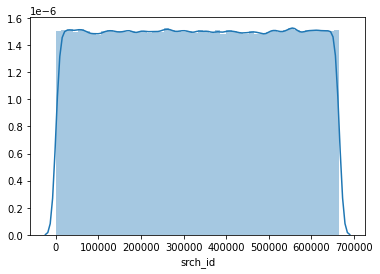

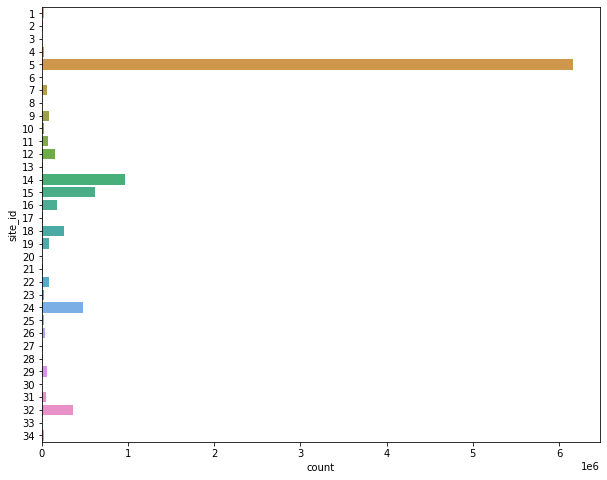

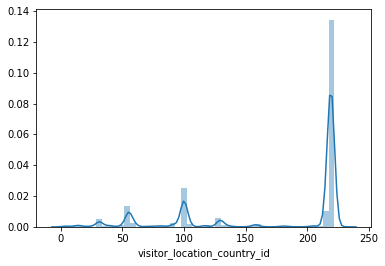

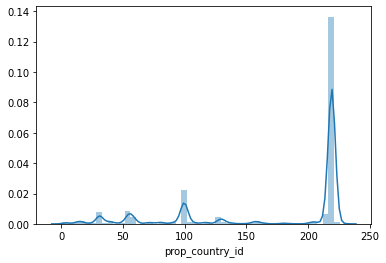

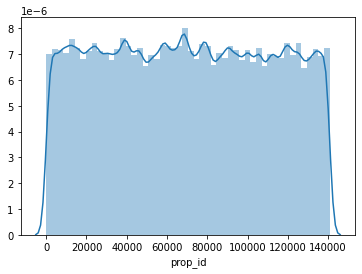

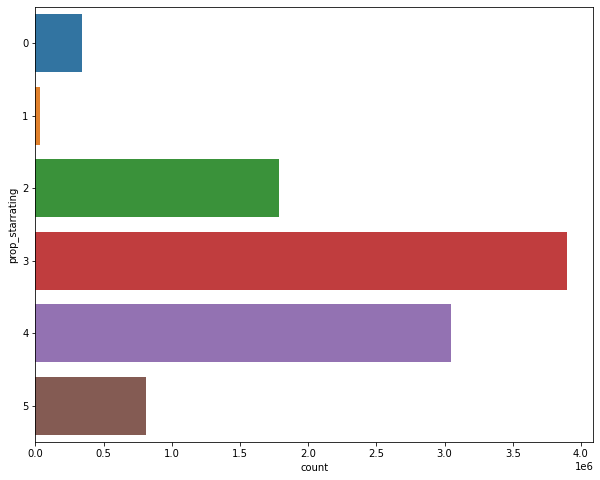

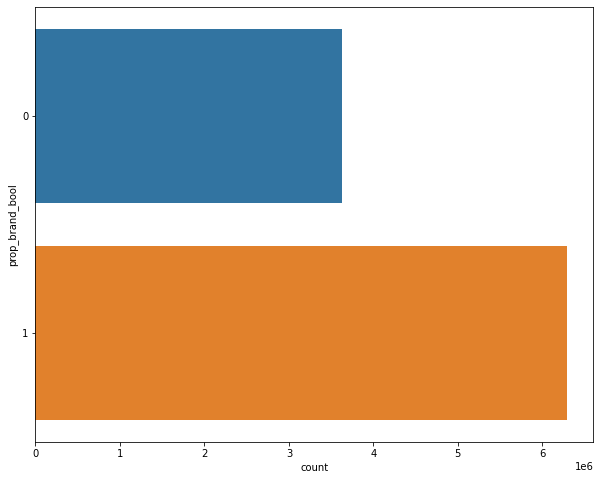

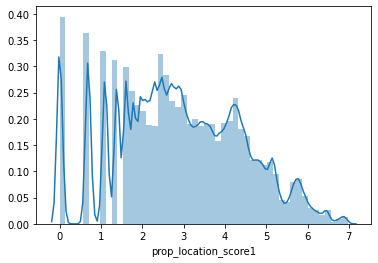

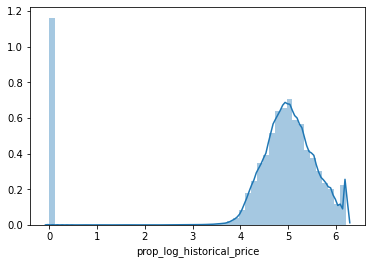

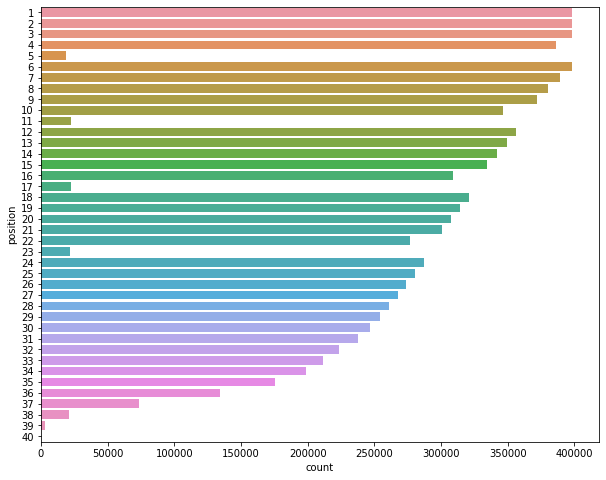

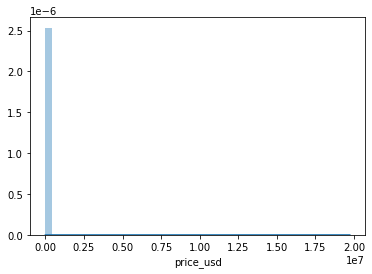

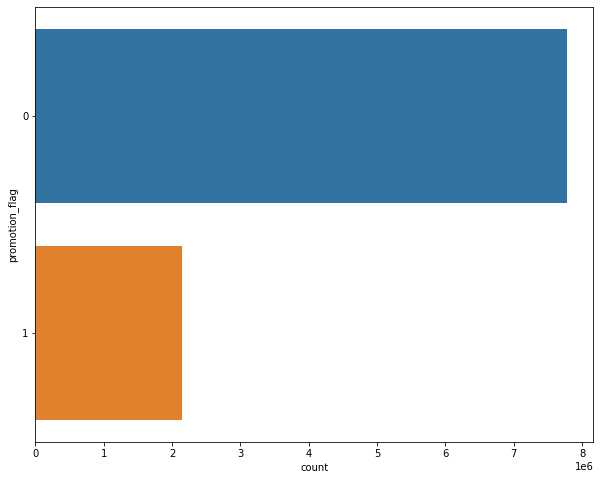

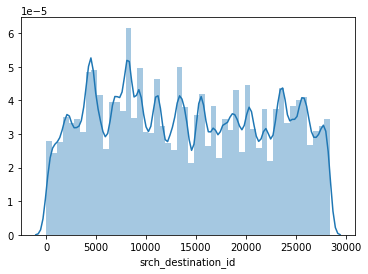

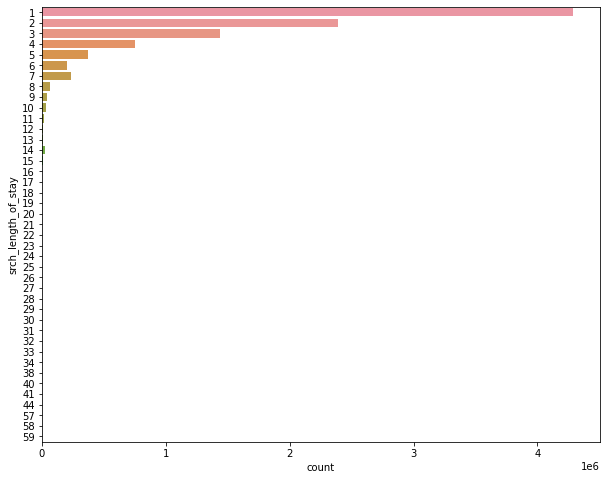

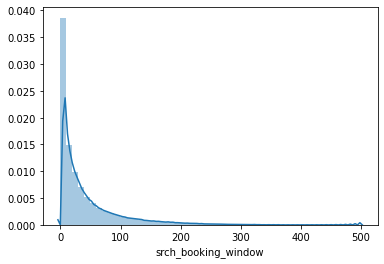

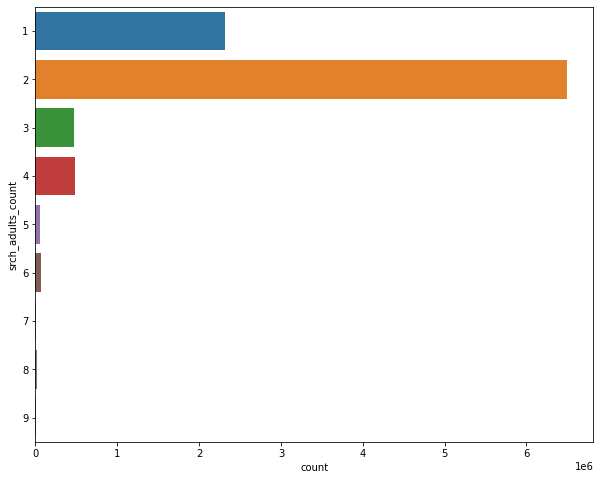

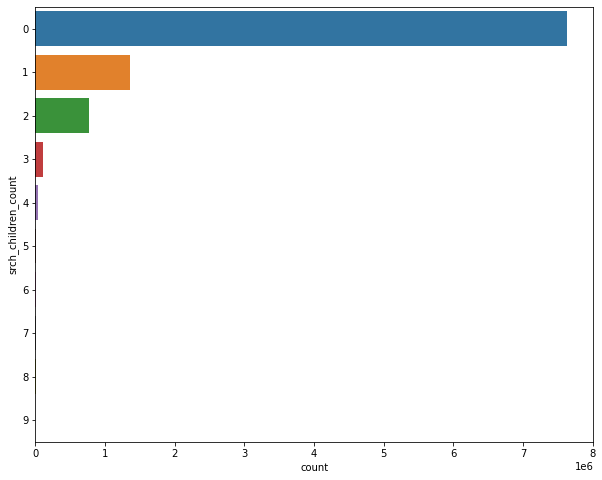

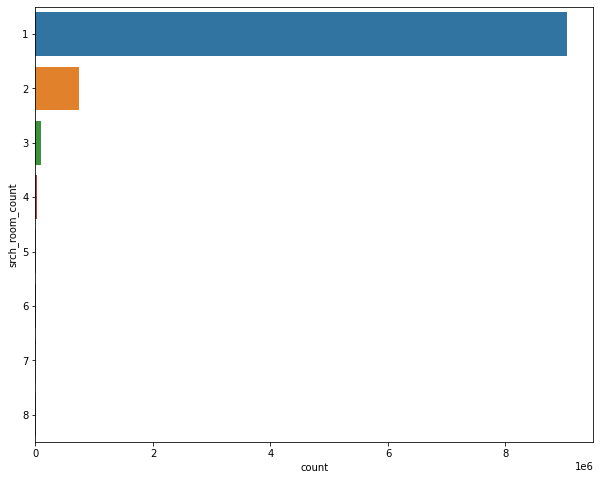

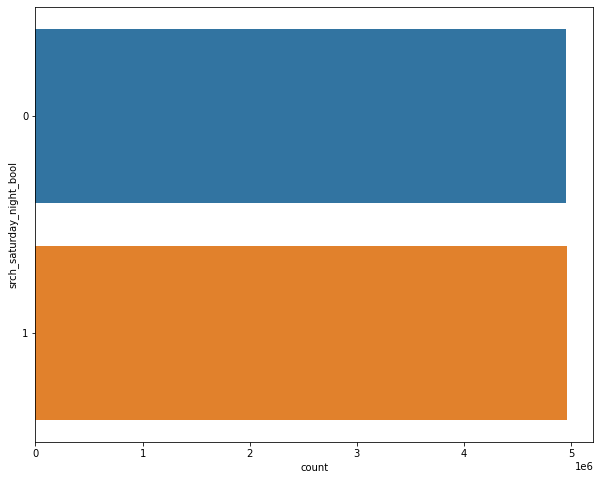

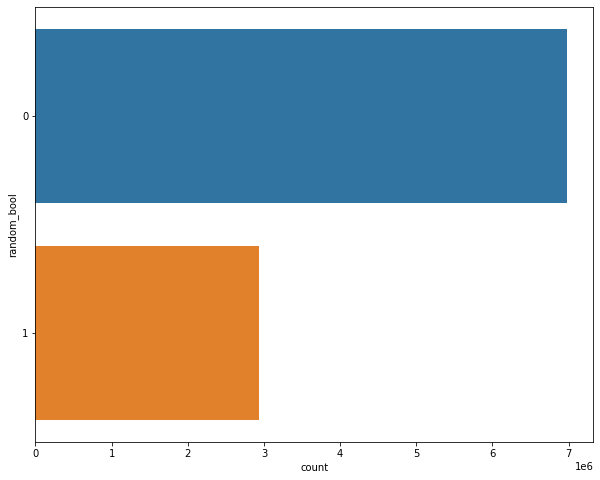

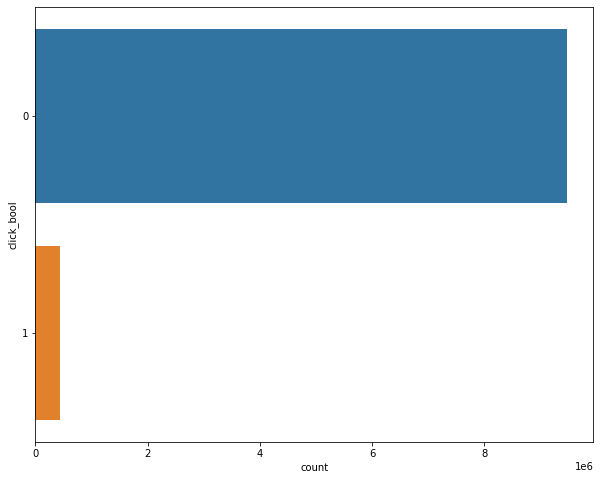

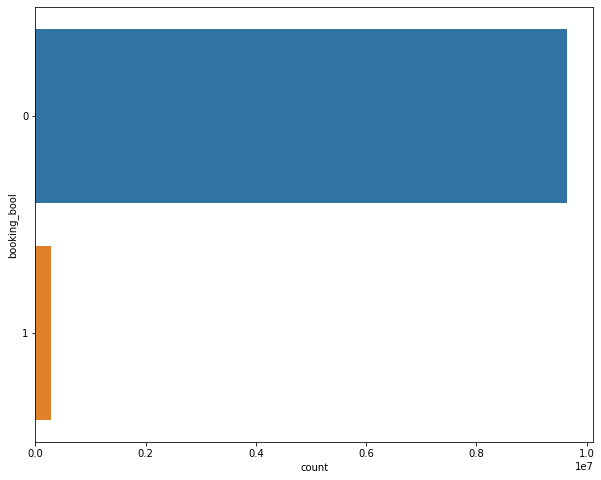

In [28]:
for item in df.columns:
  if df[item].nunique()<45:
    plt.figure(figsize=(10,8))
    sns.countplot(y=df[item])
    plt.show()
  else:
    sns.distplot(df[item])
    plt.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 61


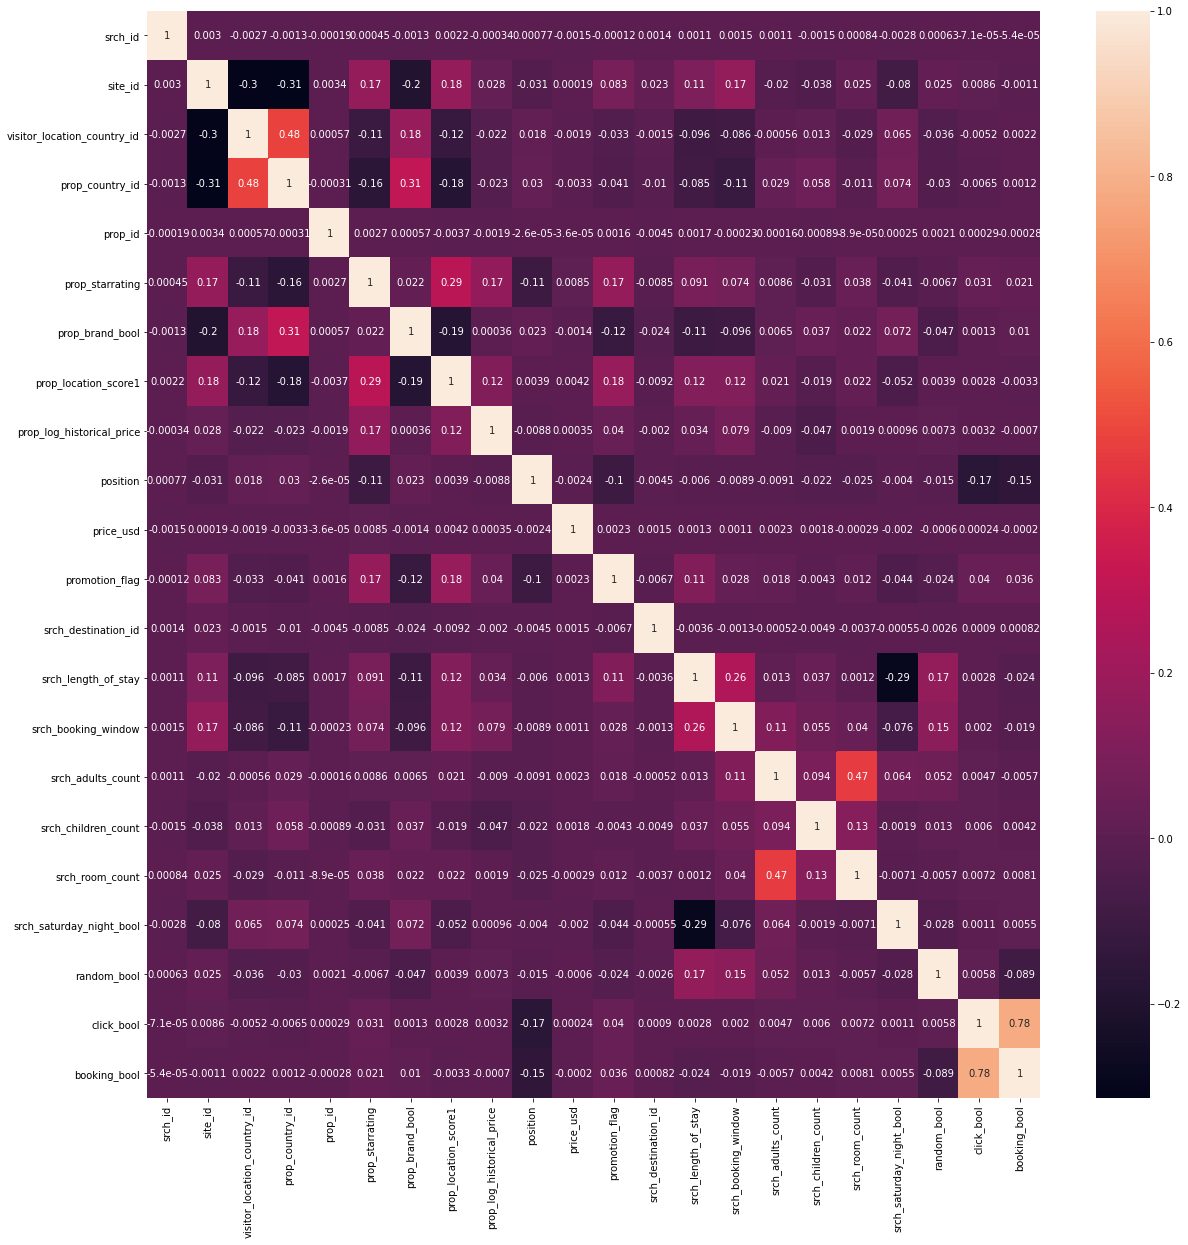

In [30]:
plt.figure(figsize= (20,20))
sns.heatmap(df.corr(),annot=True)

In [0]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [0]:
Xtrain= df
df=df.drop(['click_bool','booking_bool'],axis=1)
colnames= Xtrain.columns

In [0]:
scaler=StandardScaler()
Xtrain=scaler.fit_transform(Xtrain)

In [35]:
pca= PCA(svd_solver= 'randomized', random_state=100)
pca.fit(Xtrain)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

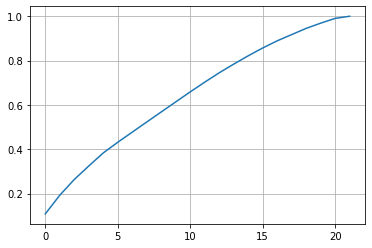

In [36]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()

In [0]:
pca_final= IncrementalPCA(n_components=16)

In [0]:
Xtrain_pca=pca_final.fit_transform(Xtrain)

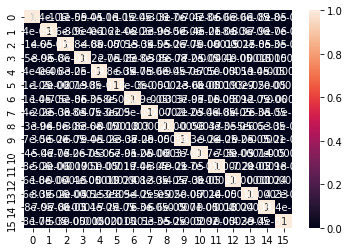

In [39]:
sns.heatmap(np.corrcoef(Xtrain_pca.transpose()),annot= True)

In [0]:
pca_df=pd.DataFrame(Xtrain_pca)

2
ERROR! Session/line number was not unique in database. History logging moved to new session 62
3
4
5
6
7
8
9


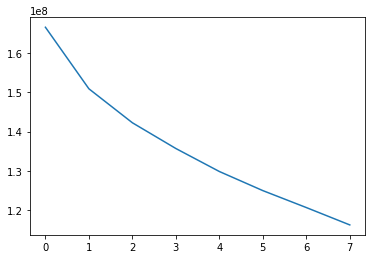

In [44]:
ssd=[]

for num in range(2,10):
    print(num)
    kmeans=KMeans(n_clusters=num, max_iter=100)
    kmeans.fit(pca_df)
    ssd.append(kmeans.inertia_)
plt.plot(ssd)

In [0]:
kmeans_final= KMeans(n_clusters=3,max_iter=100)

In [47]:
kmeans_final.fit(pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
df['Cluster_group']=kmeans_final.labels_

In [49]:
df.head()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_brand_bool,prop_location_score1,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,Cluster_group
0,1,12,187,219,893,3,1,2.83,4.95,27,104.77,0,23246,1,0,4,0,1,1,1,1
1,1,12,187,219,10404,4,1,2.20,5.03,26,170.74,0,23246,1,0,4,0,1,1,1,1
2,1,12,187,219,21315,3,1,2.20,4.92,21,179.80,0,23246,1,0,4,0,1,1,1,1
3,1,12,187,219,27348,2,1,2.83,4.39,34,602.77,0,23246,1,0,4,0,1,1,1,1
4,1,12,187,219,29604,4,1,2.64,4.93,4,143.58,0,23246,1,0,4,0,1,1,1,1


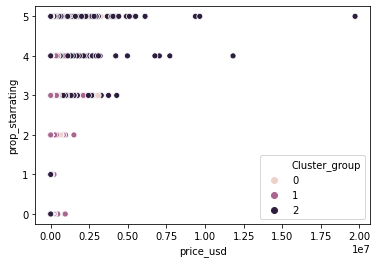

In [50]:
sns.scatterplot(df['price_usd'],df['prop_starrating'],hue=df['Cluster_group'])

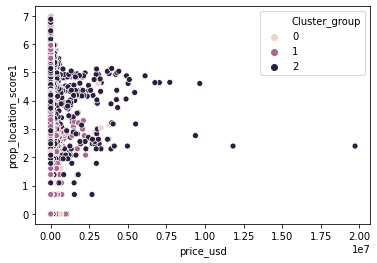

In [51]:
sns.scatterplot(df['price_usd'],df['prop_location_score1'],hue=df['Cluster_group'],,color=sns.color_palette('plasma',3))